## **Chapter 6  Analysis of Data from Longitudinal Clinical Trials**
### 6.1 Clinical Trials    
 > 6.1.1 Diastolic Blood Pressure Data

 > 6.1.2 Clinical Trial on Duodenal Ulcer Healing
### 6.2 Statistical Models
 > 6.2.1 Linear Mixed Models
 
 > 6.2.2 Generalized Linear Mixed Models

 > 6.2.3 Generalized Estimation Equation
### 6.3 Analysis of Data from Longitudinal Clinical Trials
 > 6.3.1 Analysis of the DBP Data
           
 > 6.3.1.1 Preliminary Data Analysis
 
 > 6.3.1.2 Longitudinal Modeling
            
 > 6.3.2 Analysis of Cimetidine Duodenal Ulcer Trial
 > - 6.3.2.1 Preliminary Analysis
 > - 6.3.2.2 Fit Logistic Regression to Binomial Data
 > - 6.3.2.3 Fit Generalized Linear Mixed Model
 > - 6.3.2.4 Fit GEE
### 6.4 Concluding Remarks
    

## **Chapter 6  Analysis of Data from Longitudinal Clinical Trials**

**Analysis of data from longitudinal clinical trials**
    
  - Measured over time on each clinical trial participant along with baseline covariates
  - Objective : modelling its change over time with the effects of treatment and covariates incorporating the correlation. 
  - Datasets
      - Diastolic blood pressure data
      - Clinical trial on duodenal ulcer healing

### 6.1 Clinical Trials

**Diastolic Blood Pressure Data**
  - To illustrate the longitudinal modelling for *continuous* data (`DBP1`~`DBP5`)
  - Re-analyze the DBP data in Table 3.1
  - Objective 
      - primary : test whether new drug is effective in lowering DBP as compared to placebo  (`TRT`)       
      - secondary : test for longitudinal effects and assess the effect of the two covariates (`age`, `sex`)

**Duodenal Ulcer Healing Trial**
 - To illustrate the longitudinal modelling for *categorical* data
 - Patients were followed at week 1, week 2, and week 4
 - Primary efficacy data : Ulcer healing at week 1, 2, or 4
 - Primary efficacy endpoint : Cumulative ulcer healing by week 4

### 6.2 Statistical Models 

#### 6.2.1 Linear Mixed Models

**fixed-effects model**
- $y\sim N(X\beta ,\sigma^2 I)$ 
- *treatment effect* is usually assumed to be *fixed* in the modeling process, 
- *patient effects* are considered to be *random*

**mixed-effects model**
- $y  | \gamma \sim N(X\beta + Z\gamma, \sigma^2 I)$ 
    - $\gamma$ :  term for random-effects 
- $\gamma\sim N(0,\sigma^2 D)$

*NOTE* : $var(y)=var(Z\gamma)+var(\epsilon)=\sigma^2 ZDZ'+\sigma^2 I=\sigma^2 (ZDZ'+I)$
$\Leftrightarrow y\sim N(X\beta, \sigma^2 (ZDZ'+I))$ 

**general mixed-effects model**
- $y  | \gamma \sim N(X\beta + Z\gamma ,\sigma^2\Lambda)$ 
- longitudinal trials : repeated measurements are taken over time on each patient
- measurements taken *repeatedly over time* would be *correlated*
    - correlation structure($\Lambda$)
- fixed-effects of treatment, covariates, random-effects (such as patient effects, etc.)

*NOTE* :  $var(y)=var(Z\gamma)+var(\epsilon)=\sigma^2 ZDZ'+\sigma^2 \Lambda=\sigma^2 (ZDZ'+\Lambda)\Leftrightarrow y\sim N(X\beta, \sigma^2 (ZDZ'+\Lambda))$ 

**Statistical Inference for general mixed-effect model**

- Estimate $\beta$ by classical MLE
$$
  \mbox{maximize}\  l(\beta,\sigma,D,\Lambda)\propto -\log |\sigma^2 V|-\frac{1}{\sigma^2}(y-X\beta)'V^{-1}(y-X\beta)
$$
- Estimate $V$ by restricted MLE (REML)
  - For a vector $k$ satisfying $k'X=0$
     - $k'y\sim N(0,k'Vk)$ 
     - eliminating the fixed-effects $X\beta$ from the estimation 
  - Estimate the parameters associated with $V$ only from maximizing the likelihood
  - REML less biasd than MLE

**R packages** :  *nlme, lme4, lmerTest*

#### 6.2.2 Generalized Linear Mixed Models

**GLMM**
- extending linear mixed-effect models to GLMMs, we can analyze non-normal repeated endpoints from longitudinal clinical trials
- clinical response/endpoint is a random variable following a distribution from an exponential family
$$
  f(y|\theta,\phi)=\exp\bigg[\frac{y\theta-b(\theta)}{a(\phi)}+c(y,\phi)\bigg]
$$
- $\eta=g(\mu)$ : a link function of the mean $E(Y)=\mu=\theta$
> ex) a linear predictor : $\eta=X\beta+Z\gamma$
- the likelihood function
$$
    L(\beta,\phi,V|y)=\prod_{i=1}^n\int f(y_i|\beta,\phi,\gamma)h(\gamma|V)d\gamma
$$
$h(\gamma|V)$ : the random-effects $\gamma$ with parameter $V$
- Maximizing the likelihood is difficult $\rightarrow$ approximation approaches are used
  - R package *MASS*(Penalized Quasi-Likelihood method)
  - R packages *lme4, nlme*



#### 6.2.3 Generalized Estimating Equation

**GEE**
- version of quasi-likelihood approach for repeated measures when no distributional assumptions are made
- essentially the multivariate extension of the generalized linear model and the quasi-likelihood method
- the quasi-likelihood approach requires only the link function and the variance
$$
    \sum_i\bigg(\frac{\partial\mu_i}{\partial\beta}\bigg)'\frac{Y_i-\mu_i}{var(Y_i)}=0
$$
- R package *gee*

### 6.3 Analysis of Data from LCTs

#### 6.3.1 Analysis of DBP Data

**Data**


In [1]:
#install.packages('ggExtra')
library(tidyverse)
library(lattice)
library(ggExtra)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.2     √ purrr   0.3.3
√ tibble  3.0.1     √ dplyr   0.8.3
√ tidyr   1.0.2     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.2"
Warning message:
"package 'readr' was built under R version 3.6.2"
Warning message:
"package 'purrr' was built under R version 3.6.2"
Warning message:
"package 'dplyr' was built under R version 3.6.2"
Warning message:
"package 'stringr' was built under R version 3.6.2"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dat  = read.csv("C:\\Users\\USER\\Desktop\\2021fall\\생물통계학\\R&SAS4CTDA2\\DBP.csv",header=T)

head(dat)
summary(dat)

,Subject,TRT,DBP1,DBP2,DBP3,DBP4,DBP5,Age,Sex
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1,A,114,115,113,109,105,43,F
2,2,A,116,113,112,103,101,51,M
3,3,A,119,115,113,104,98,48,F
4,4,A,115,113,112,109,101,42,F
5,5,A,116,112,107,104,105,49,M
6,6,A,117,112,113,104,102,47,M


    Subject      TRT         DBP1            DBP2            DBP3      
 Min.   : 1.00   A:20   Min.   :114.0   Min.   :111.0   Min.   :100.0  
 1st Qu.:10.75   B:20   1st Qu.:115.0   1st Qu.:113.0   1st Qu.:112.0  
 Median :20.50          Median :116.5   Median :115.0   Median :113.0  
 Mean   :20.50          Mean   :116.7   Mean   :114.3   Mean   :112.4  
 3rd Qu.:30.25          3rd Qu.:118.0   3rd Qu.:115.0   3rd Qu.:113.0  
 Max.   :40.00          Max.   :121.0   Max.   :119.0   Max.   :118.0  
      DBP4            DBP5            Age        Sex   
 Min.   :102.0   Min.   : 97.0   Min.   :38.00   F:18  
 1st Qu.:106.8   1st Qu.:101.8   1st Qu.:42.00   M:22  
 Median :109.0   Median :106.5   Median :48.00         
 Mean   :109.3   Mean   :106.7   Mean   :47.83         
 3rd Qu.:113.2   3rd Qu.:112.0   3rd Qu.:51.25         
 Max.   :117.0   Max.   :115.0   Max.   :63.00         

**6.3.1.1 Data Graphics and Response Feature Analysis**

- preliminary data analysis
- extract fundamental features from each patient for simple and preliminary data exploration and summarization





**Transformation of *wide* form dataframe dat  into  *long* form**

In [3]:
# reshape the data into "long" direction
Dat <- dat %>%
      pivot_longer(cols = starts_with('DBP'),   # 변환할 변수 열  지정, DBP1:DBP5  
               names_to = "Time",               # 변환할 변수명을 값으로 하는 열 이름
               values_to = "DBP",               # 변환할 변수들의 값을 저장할 열 이름
               names_prefix='DBP')              # 접두사제거(prefix)
head(Dat)

Subject,TRT,Age,Sex,Time,DBP
<int>,<fct>,<int>,<fct>,<chr>,<int>
1,A,43,F,1,114
1,A,43,F,2,115
1,A,43,F,3,113
1,A,43,F,4,109
1,A,43,F,5,105
2,A,51,M,1,116


In [4]:
glimpse(Dat)

Rows: 200
Columns: 6
$ Subject <int> 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,...
$ TRT     <fct> A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A,...
$ Age     <int> 43, 43, 43, 43, 43, 51, 51, 51, 51, 51, 48, 48, 48, 48, 48,...
$ Sex     <fct> F, F, F, F, F, M, M, M, M, M, F, F, F, F, F, F, F, F, F, F,...
$ Time    <chr> "1", "2", "3", "4", "5", "1", "2", "3", "4", "5", "1", "2",...
$ DBP     <int> 114, 115, 113, 109, 105, 116, 113, 112, 103, 101, 119, 115,...


Start with data graphics to illustrate the data and reveal the data trend longitudinally

**Plot of the DBP as a function of time points for each patient**
  - the first 20 patients from treatment A
  - the first 20 patients from treatment B

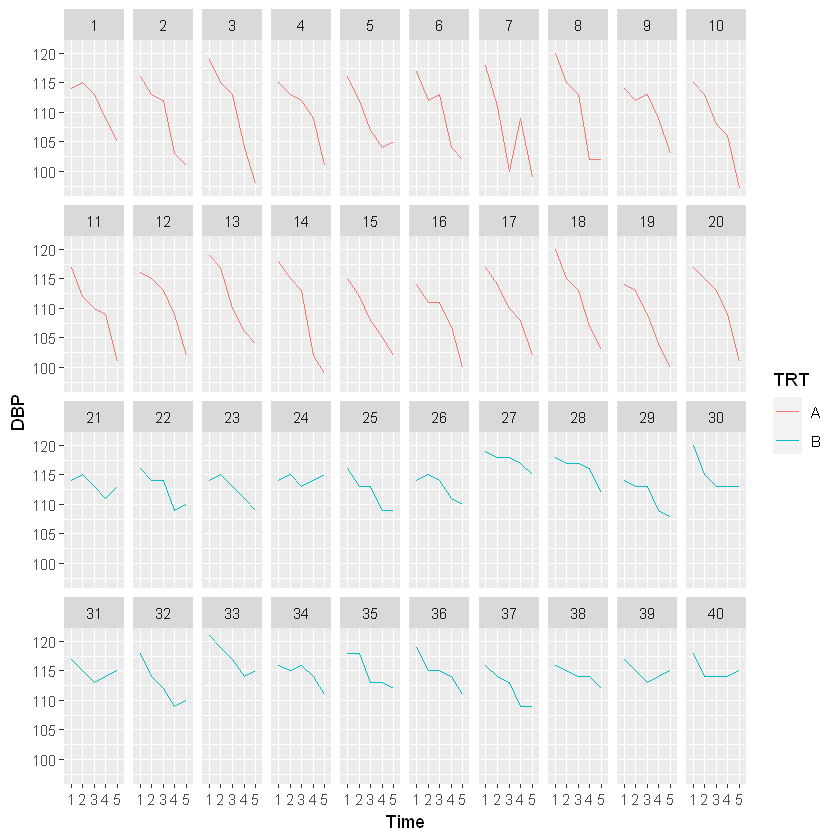

In [5]:
ggplot(Dat,aes(x=Time, y=DBP, group=Subject,color = TRT)) + 
    geom_line() + 
    facet_wrap( ~ Subject, ncol=10)
# xyplot(DBP~Time|as.factor(Subject),type="l", groups=TRT,lty=c(1,8),lwd=2,layout=c(10,4), Dat)

**Plot of DBP as a function of time grouped for all paiteints**

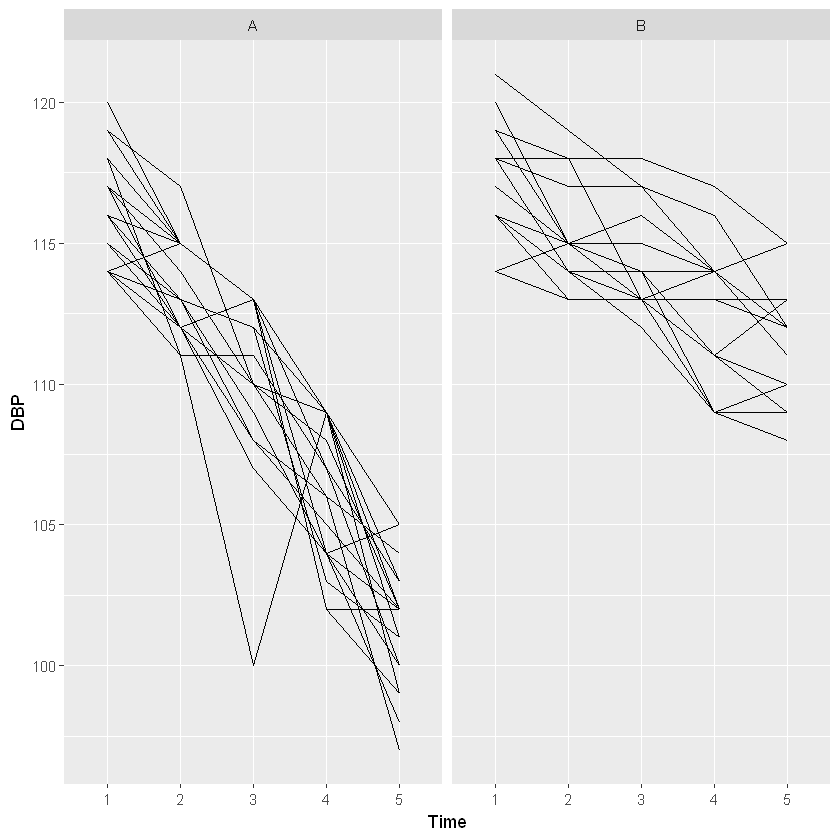

In [6]:
ggplot(Dat,aes(x=Time, y=DBP,group=Subject)) + 
    geom_line()+
    facet_grid(~TRT)
# xyplot(DBP~Time|as.factor(Subject),type="l", groups=TRT,lty=c(1,8),lwd=2,layout=c(10,4), Dat)

- revealed trends 
  - on average DBP declines at a faster rate in treatment A than in treatment B
  - the magnitude of the decline in treatment A is greater than that in treatment B
  - the rate and extent of decline varies across the 40 pateints

**Boxplot**

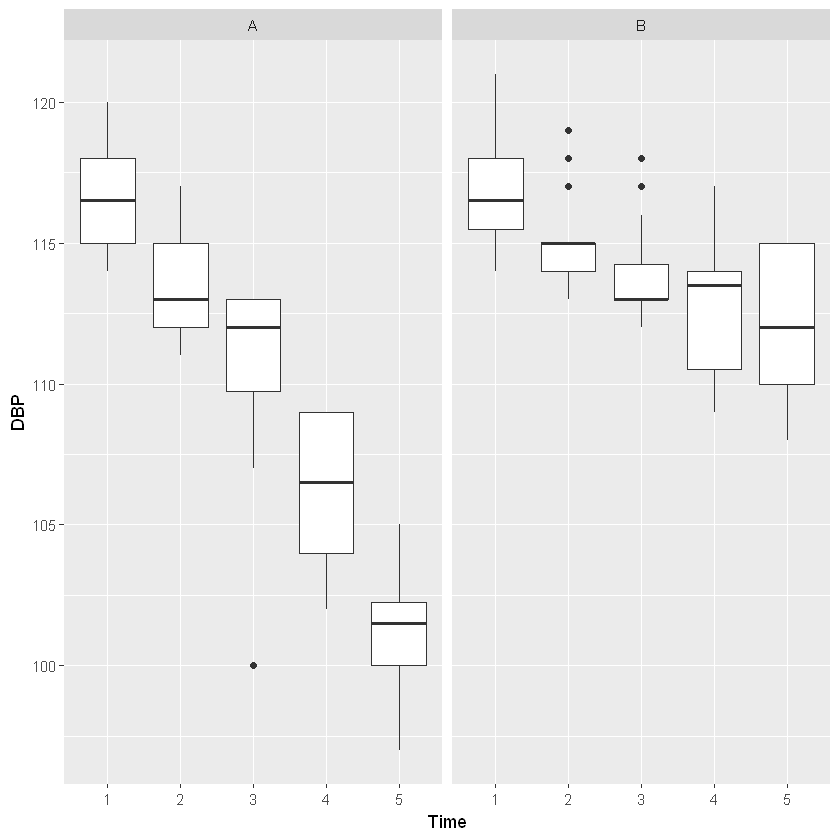

In [7]:
ggplot(Dat,aes(x=Time, y=DBP)) +
         geom_boxplot()+
         facet_wrap( ~ TRT)

- the rate and extent of the decline in DBP is greater in treatment A than in treatment B

**Further investigation of the declining trend**
- by estimating the slope and intercept for each patient

In [8]:
lm(DBP~Time, Dat[Dat$Subject==1,])$coefficients

(Intercept)       Time2       Time3       Time4       Time5 
        114           1          -1          -5          -9

Note the type of `Time` is `character` so that its type need to be changed into `numeric` first. 

In [9]:
num.Subj <- 40
intercept <- slope <- numeric(num.Subj) # initiate the intercept and slope

Dat$Time <- as.numeric(Dat$Time)  #character -> numeric


In [10]:

for(i in 1:num.Subj){
    mod <- lm(DBP~Time, Dat[Dat$Subject==i,]) # fit regression model
    
    intercept[i]<- coef(mod)[1]   # extract the intercept and slope
    slope[i] <-  coef(mod)[2]
}

dat.coef <- data.frame(Subject=dat$Subject,TRT=dat$TRT, Intercept = intercept, Slope=slope) # make a dataframe "dat.coef" 
head(dat.coef)

,Subject,TRT,Intercept,Slope
,<int>,<fct>,<dbl>,<dbl>
1,1,A,118.4,-2.4
2,2,A,121.0,-4.0
3,3,A,125.7,-5.3
4,4,A,119.6,-3.2
5,5,A,117.8,-3.0
6,6,A,121.0,-3.8


Note that the intercepts vary about 12mmHg with a slope of about -2.5 mmHg/month

**Bivariate plot of the intercept and slope from the 40 patients**

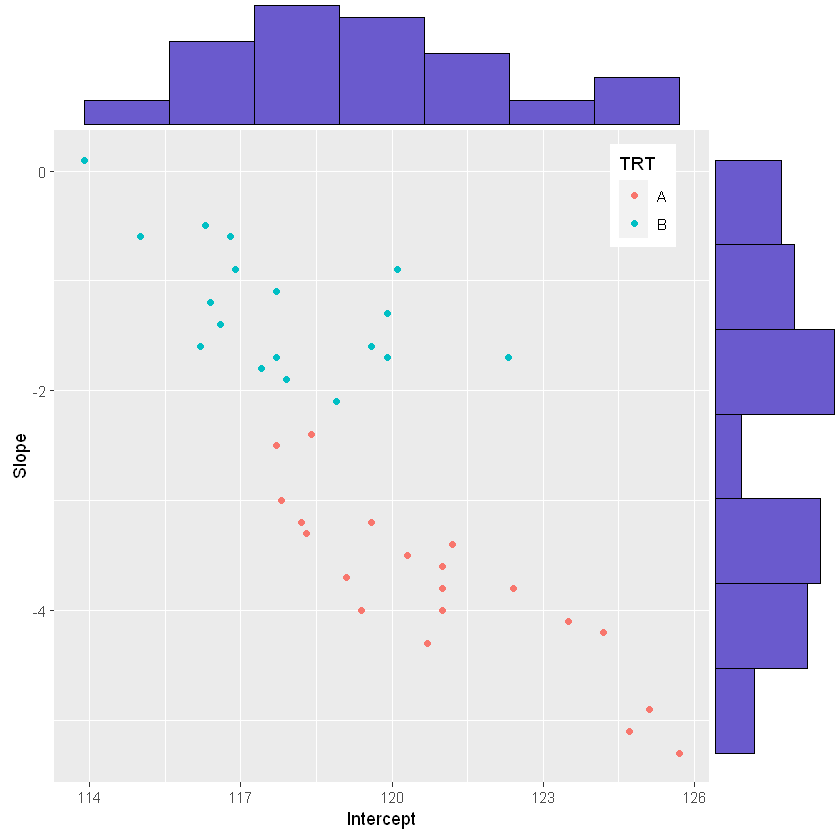

In [11]:
p <- ggplot(dat.coef, aes(x=Intercept, y=Slope, color=TRT))+ 
        geom_point()+ 
        theme(legend.position=c(0.9,0.9))
ggMarginal(p, type='histogram',  fill = "slateblue", xparams=list(bins=8), yparams=list(bins=8))

- the declining trend by treatment group shown
  - the slope declines faster in treatment group A in treatment group B
  - the average baseline DBP is about 120 mmHg as characterized by the intercept.
  - the variation embedded in the intercepts and slopes illustrate the modeling of *random-effects* for both intercept and slope

**Modeling the slope and intercept relationship by a linear regression**

In [12]:
# fit model 1 with interation
mod1.coef = lm(Slope~Intercept*TRT, dat.coef)
summary(mod1.coef)


Call:
lm(formula = Slope ~ Intercept * TRT, data = dat.coef)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66359 -0.29475 -0.03143  0.34701  0.75317 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    28.33737    4.68741   6.045 6.04e-07 ***
Intercept      -0.26539    0.03874  -6.850 5.17e-08 ***
TRTB           -8.29639    7.37956  -1.124    0.268    
Intercept:TRTB  0.08475    0.06198   1.367    0.180    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4293 on 36 degrees of freedom
Multiple R-squared:  0.919,	Adjusted R-squared:  0.9122 
F-statistic: 136.1 on 3 and 36 DF,  p-value: < 2.2e-16


In [13]:
# fit model 2 without interaction
mod2.coef = lm(Slope~Intercept+TRT, dat.coef)
summary(mod2.coef)


Call:
lm(formula = Slope ~ Intercept + TRT, data = dat.coef)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73316 -0.38494  0.02806  0.33483  0.87272 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.33216    3.70220   6.572 1.06e-07 ***
Intercept   -0.23228    0.03059  -7.592 4.68e-09 ***
TRTB         1.79136    0.16831  10.643 8.16e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4343 on 37 degrees of freedom
Multiple R-squared:  0.9147,	Adjusted R-squared:  0.9101 
F-statistic: 198.5 on 2 and 37 DF,  p-value: < 2.2e-16


- Model 1 
  -   the interaction (Inercept: TRTB) is not statistically significant
- Model2 
  -  there is a significant difference between the two treatments (TRT B)

**Further analysis of the difference between treatments by `t-test`**

In [14]:
t.test(Slope~TRT, dat.coef)   # test slope difference


	Welch Two Sample t-test

data:  Slope by TRT
t = -11.673, df = 35.556, p-value = 1.019e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.96976 -2.09024
sample estimates:
mean in group A mean in group B 
         -3.765          -1.235 


In [15]:
t.test(Intercept~TRT, dat.coef) # test intercept difference


	Welch Two Sample t-test

data:  Intercept by TRT
t = 4.3669, df = 36.266, p-value = 0.0001008
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.703495 4.656505
sample estimates:
mean in group A mean in group B 
        120.965         117.785 


**6.3.1.2 Longitudinal Modeling**

- fit a series models to help in determining the best model using Rpackage `lme4`


In [16]:
#install.packages("lmerTest")
library(lmerTest)  # load the library lme4

Warning message:
"package 'lmerTest' was built under R version 3.6.3"
Loading required package: lme4

Warning message:
"package 'lme4' was built under R version 3.6.3"
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step




**Model 1** with TRT-by-Time interaction and random-effects on the intercept and slope on Time 

**Model 2** with with TRT-by-Time interaction and random-intercept 
only

comparison of two models


In [17]:
mod1DBP =  lmer(DBP~TRT*Time+(Time|Subject), Dat)  # Fit Model 1

mod2DBP =  lmer(DBP~TRT*Time+(1|Subject), Dat)  # Fit Model 2
   
anova(mod1DBP, mod2DBP)  # model comparison


refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mod2DBP,6,884.5423,904.3322,-436.2711,872.5423,NA,NA,NA
mod1DBP,8,886.4223,912.8088,-435.2111,870.4223,2.119995,2,0.3464567


anova test for model comparison
- *p*-value=0.35 $\rightarrow$ two models are not significantly different
- simpler `Model 2` is recommended

In [18]:
summary(mod2DBP)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: DBP ~ TRT * Time + (1 | Subject)
   Data: Dat

REML criterion at convergence: 877.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2031 -0.5418 -0.0512  0.5541  2.3326 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 1.377    1.174   
 Residual             3.815    1.953   
Number of obs: 200, groups:  Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 120.9650     0.5279 159.1764  229.15  < 2e-16 ***
TRTB         -3.1800     0.7466 159.1764   -4.26 3.49e-05 ***
Time         -3.7650     0.1381 158.0000  -27.26  < 2e-16 ***
TRTB:Time     2.5300     0.1953 158.0000   12.95  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
          (Intr) TRTB   Time  
TRTB      -0.707              
Time      -0.785  0.555       
TRTB:Time  0.555 -0.785 

**Further investigation of the interaction effect between TRT and Time**

**Model 3** : remove the interaction but keep the random effects for both intercept and slope to contrast with Model 2

**Model 4** : simplified version of Model3 with intercept as the only random-effects

In [19]:
mod3DBP =  lmer(DBP~TRT+Time+(Time|Subject), Dat)  # Fit Model 3 

mod4DBP =  lmer(DBP~TRT+Time+(1|Subject), Dat)   # Fit Model 4

anova(mod3DBP, mod4DBP)   # model comparison

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.00421966 (tol = 0.002, component 1)"
refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mod4DBP,5,998.3321,1014.8236,-494.1660,988.3321,NA,NA,NA
mod3DBP,7,945.3403,968.4286,-465.6702,931.3403,56.99172,2,4.211191e-13


- Model 3 is statistically significantly different from Model 4 (*p*-value< 0.0001) 
- $\rightarrow$ utilize Model 3 further to investigate the effects from the covariates 

In [20]:
summary(mod3DBP)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: DBP ~ TRT + Time + (Time | Subject)
   Data: Dat

REML criterion at convergence: 933.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3319 -0.5517 -0.0048  0.5203  2.5241 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 Subject  (Intercept) 12.629   3.554         
          Time         1.747   1.322    -0.95
 Residual              3.534   1.880         
Number of obs: 200, groups:  Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 117.6478     0.6817  26.8837 172.572  < 2e-16 ***
TRTB          3.4543     0.4555  37.9782   7.584 4.05e-09 ***
Time         -2.5000     0.2291  38.9696 -10.910 2.07e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
     (Intr) TRTB  
TRTB -0.334       
Time -0.881  0.000
convergence code: 0
Model failed to converge with max|g

**Model 3** 
$$
  DBP_{ijk}=(\beta_0+\gamma_{0k})+(\beta_1+\gamma_{1k})\times Time_j+\beta_2\times TRT_i+\epsilon_{ijk}
$$
where $i$ for treatment A or B, $j$ for time from 1 to 5 and $k$ for patient from 1 to 40.

- Fixed-effects 
   - $\widehat{\beta}_0=117.6$
   - $\widehat{\beta}_1=-2.5$ indicating the DBP declines at a rate 2.5mmHg per month
   - $\widehat{\beta}_2$=3.454 : estimated difference between the rates of decine f treatment B and A=3.454mmHg/month
   - all parameters are statistically significant

- Random-effects
  - estimated $\widehat{\sigma}=3.54,\quad \widehat{D}=\begin{pmatrix}
12.62 & -4.44\\
-4.44 & 1.75
\end{pmatrix}$   

**Model diagnostics** using the residuals
1. normal assumption for the random-effects : Q-Q plot


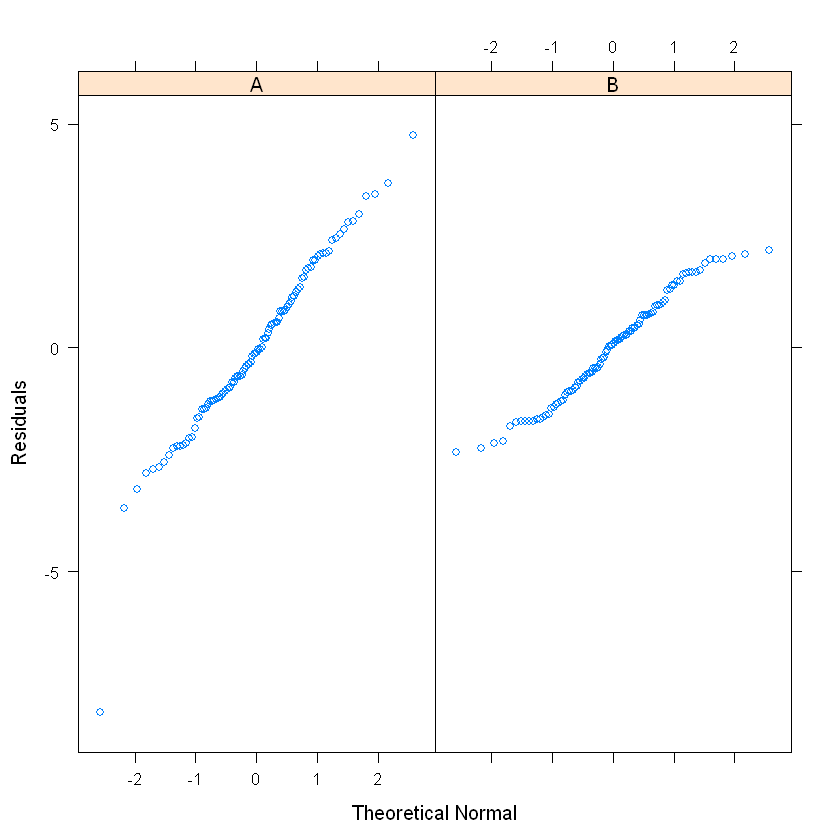

In [21]:
print(qqmath(~resid(mod3DBP)|TRT,Dat, 
             xlab="Theoretical Normal", ylab="Residuals"))

the Q-Q plot exhibits
- a straight line for each treatment indicating no violation of the normality assumption

2. plot the residulas as a function of time by treatment group, which indicated tha tmOdel 3 is reasonable

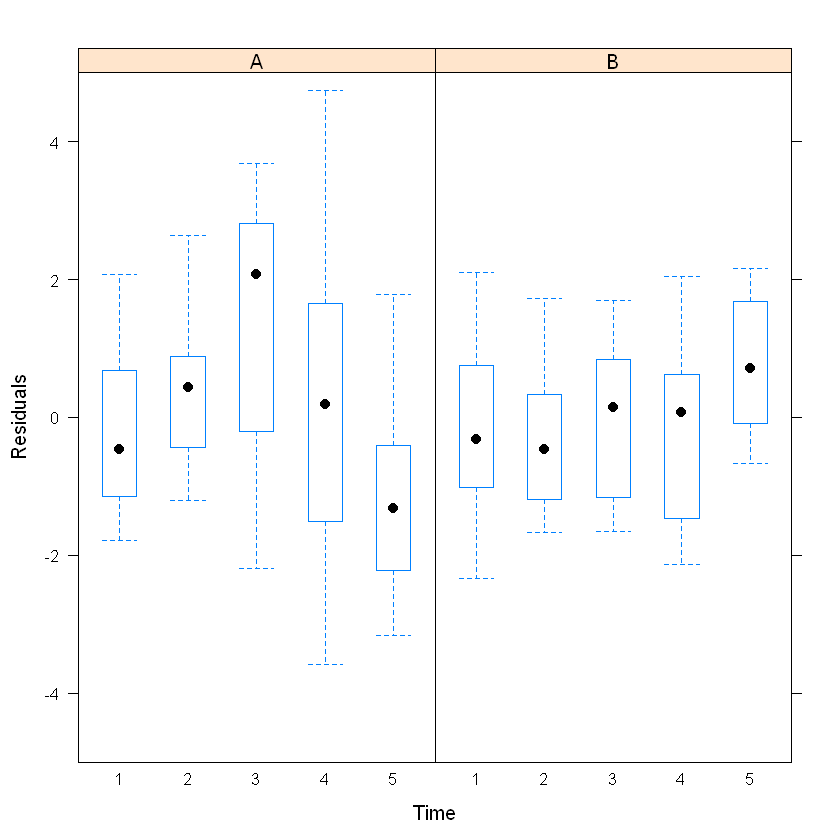

In [22]:
print(bwplot(resid(mod3DBP)~as.factor(Time)|TRT,Dat, 
	xlab="Time",ylim=c(-5,5), ylab="Residuals"))

**Investigation of the effects of the covariates of `Age` and `Sex`**

**Model 5** : Model 3 with the `Age`

In [23]:
mod5DBP =  lmer(DBP~TRT+Time+Age+(Time|Subject), Dat)  # fit Model 5 include ``Age" effect

anova(mod3DBP, mod5DBP)  # call anova to test ``Age" effect

boundary (singular) fit: see ?isSingular

Warning message:
"Model failed to converge with 1 negative eigenvalue: -3.5e+01"
refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mod3DBP,7,945.3403,968.4286,-465.6702,931.3403,NA,NA,NA
mod5DBP,8,943.9820,970.3686,-463.9910,927.9820,3.358303,1,0.06686695


- anova test *p*-value< 0.0001 $\rightarrow$ `Age` effect is statistically significant

**Model 6** : Model 5 with `Sex`

In [24]:
mod6DBP =  lmer(DBP~TRT+Time+Age+Sex+(Time|Subject), Dat)  # fit Model 6 including ``Age" and ``Sex"

anova(mod5DBP, mod6DBP)  # test the ``Sex" effect

boundary (singular) fit: see ?isSingular

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mod5DBP,8,943.9820,970.3686,-463.9910,927.9820,NA,NA,NA
mod6DBP,9,912.3291,942.0139,-447.1645,894.3291,33.65297,1,6.587432e-09


- *p*-value=0.41 $\rightarrow$ `Sex` is not a statistically significant effect

The conclusion coincides with the conclusions in Section 4.3.1.2 of Chapter 4

#### 6.3.2 Ananlysis of Cimetidine Duodenal Ulcer Trial

**6.3.2.1 Preliminary Anlysis**

In [25]:
dat  = read.csv("C:\\Users\\USER\\Desktop\\2021fall\\생물통계학\\R&SAS4CTDA2\\Ulcer.csv",header=T)

head(dat)
summary(dat)

,Subject,TRT,WeekH,Time0,Time1,Time2,Time4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,3,0,0,0,0,0
2,2,4,2,0,0,1,1
3,3,2,2,0,0,1,1
4,4,3,2,0,0,1,1
5,5,4,1,0,1,1,1
6,6,1,0,0,0,0,0


    Subject         TRT            WeekH           Time0       Time1      
 Min.   :  1   Min.   :1.000   Min.   :0.000   Min.   :0   Min.   :0.000  
 1st Qu.: 85   1st Qu.:2.000   1st Qu.:0.000   1st Qu.:0   1st Qu.:0.000  
 Median :169   Median :3.000   Median :1.000   Median :0   Median :0.000  
 Mean   :169   Mean   :2.579   Mean   :1.555   Mean   :0   Mean   :0.184  
 3rd Qu.:253   3rd Qu.:4.000   3rd Qu.:2.000   3rd Qu.:0   3rd Qu.:0.000  
 Max.   :337   Max.   :4.000   Max.   :4.000   Max.   :0   Max.   :1.000  
     Time2            Time4       
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :1.0000  
 Mean   :0.3887   Mean   :0.6291  
 3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000  

**Summary** informationin Table 6.1 for the four treatment groups and four time points

In [26]:

n  = tapply(rep(1, dim(dat)[1]),dat$TRT,sum)  # total n for each TRT
n1 = tapply(dat$Time1,dat$TRT,sum)  # number for time 1
n2 = tapply(dat$Time2,dat$TRT,sum)  # number for time 2
n4 = tapply(dat$Time4,dat$TRT,sum)  # number for time 4

print(rbind(n,n1,n2,n4))

    1  2  3  4
n  76 83 85 93
n1 14 15 14 19
n2 22 31 33 45
n4 31 51 62 68


In [27]:
print( round(rbind(n1/n,n2/n,n4/n),2))  # proportions

        1    2    3    4
[1,] 0.18 0.18 0.16 0.20
[2,] 0.29 0.37 0.39 0.48
[3,] 0.41 0.61 0.73 0.73


**6.3.2.2. Fit Logistic Regression to Binomial Data**

- reshape the data into `long` format

In [28]:
# reshape the data into "long" direction
Dat <- dat %>%
      pivot_longer(cols = starts_with('Time'),   # 변환할 변수 열  지정, DBP1:DBP5  
               names_to = "Time",               # 변환할 변수명을 값으로 하는 열 이름
               values_to = "Heal",               # 변환할 변수들의 값을 저장할 열 이름
               names_prefix='Time')              # 접두사제거(prefix)
head(Dat)

Subject,TRT,WeekH,Time,Heal
<int>,<int>,<int>,<chr>,<int>
1,3,0,0,0
1,3,0,1,0
1,3,0,2,0
1,3,0,4,0
2,4,2,0,0
2,4,2,1,0


In [29]:
Dat   <- Dat %>% 
            arrange(Subject) %>%   # sort the data by Subject: very important for gee
            filter(Time != '0')  %>%  # Remove the baseline for model fitting
            mutate( TRT=as.factor(TRT), Time=as.factor(Time))  # make the TRT and Time as factors
head(Dat)

Subject,TRT,WeekH,Time,Heal
<int>,<fct>,<int>,<fct>,<int>
1,3,0,1,0
1,3,0,2,0
1,3,0,4,0
2,4,2,1,0
2,4,2,2,1
2,4,2,4,1


**Preliminary analysis** using `glm` 

**Model 1** : logistic regression models with interaction 

**Model 2** : logistic regression models without interaction 

In [30]:
mod1glm = glm(Heal~TRT*Time, family=binomial, Dat)    # fit Model 1: with interaction
mod2glm = glm(Heal~TRT+Time, family=binomial, data=Dat)  # fit Model 2: without interaction

anova(mod1glm,mod2glm, test="Chi")   # test these two model using Chi-Square test

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,999,1185.762,NA,NA,NA
2,1005,1195.513,-6,-9.751716,0.1355047


TRT-by-Time interaction effect is not statistically significant (*p*-value =0.1355) $\rightarrow$ Model 2 selected 

In [31]:
summary(mod2glm)


Call:
glm(formula = Heal ~ TRT + Time, family = binomial, data = Dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5732  -0.9694  -0.6155   0.9758   2.0883  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.0606     0.2048 -10.060  < 2e-16 ***
TRT2          0.4929     0.2095   2.353  0.01862 *  
TRT3          0.6762     0.2076   3.257  0.00112 ** 
TRT4          0.8929     0.2036   4.386 1.15e-05 ***
Time2         1.0564     0.1813   5.825 5.69e-09 ***
Time4         2.0625     0.1829  11.277  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1361.3  on 1010  degrees of freedom
Residual deviance: 1195.5  on 1005  degrees of freedom
AIC: 1207.5

Number of Fisher Scoring iterations: 4


- `Time` and `TRT` are statistically significant.

**Multiple comparison** using `Tukey`-test

In [40]:
library(multcomp) # load the ``multcomp" library

In [33]:
# multiple comparisons
glht.mod2glm = glht(mod2glm, mcp(TRT="Tukey", Time="Tukey"))
summary(glht.mod2glm)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glm(formula = Heal ~ TRT + Time, family = binomial, data = Dat)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
TRT: 2 - 1 == 0    0.4929     0.2095   2.353  0.13040    
TRT: 3 - 1 == 0    0.6762     0.2076   3.257  0.00954 ** 
TRT: 4 - 1 == 0    0.8929     0.2036   4.386  < 0.001 ***
TRT: 3 - 2 == 0    0.1833     0.1961   0.935  0.91780    
TRT: 4 - 2 == 0    0.4000     0.1915   2.089  0.23360    
TRT: 4 - 3 == 0    0.2167     0.1889   1.147  0.82418    
Time: 2 - 1 == 0   1.0564     0.1813   5.825  < 0.001 ***
Time: 4 - 1 == 0   2.0625     0.1829  11.277  < 0.001 ***
Time: 4 - 2 == 0   1.0061     0.1611   6.246  < 0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


- the healing rates differ across time poitns in a statistically significant manner
> $\rightarrow$ ulcer healing is significant between weeks 2 and 1 (*p*-value< 0.001), weeks 4 and 1 (*p*-value< 0.001), and weeks 4 and 2 (*p*-value< 0.001)
- statistically significant differences between treatments 3 and 1 (*p*-value=0.0094) and between treatments 4 to 1 (*p*-value< 0.001)only 
> $\rightarrow$ 800 mg C and 1600 mg C are statistically more effective than Placebo in ulcer healing

- no statistically significant difference exists for other treatment comparison.

**6.3.2.3 Fit Genralized Linear Mixed Model**
- variability among patients in terms of ulcer healing

**Model 3** : the generalized mixed effects model (GLMM)

- penalized quasi-likelihood methods in R using `MASS` library for illustration

In [34]:
library(MASS)   # load MASS library

In [35]:
mod3glm = glmmPQL(Heal~TRT, random=~1|Subject, family=binomial, Dat)  # fit the Model 3
summary(mod3glm)

iteration 1

iteration 2

iteration 3

iteration 4

iteration 5



Linear mixed-effects model fit by maximum likelihood
 Data: Dat 
  AIC BIC logLik
   NA  NA     NA

Random effects:
 Formula: ~1 | Subject
        (Intercept)  Residual
StdDev:    1.634956 0.8121881

Variance function:
 Structure: fixed weights
 Formula: ~invwt 
Fixed effects: Heal ~ TRT 
                 Value Std.Error  DF   t-value p-value
(Intercept) -1.1920566 0.2458200 674 -4.849307  0.0000
TRT2         0.6026542 0.3318616 333  1.815981  0.0703
TRT3         0.8273113 0.3273104 333  2.527605  0.0119
TRT4         1.0471522 0.3212941 333  3.259170  0.0012
 Correlation: 
     (Intr) TRT2   TRT3  
TRT2 -0.741              
TRT3 -0.751  0.556       
TRT4 -0.765  0.567  0.575

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-1.5590734 -0.4933567 -0.3896715  0.6307607  1.8648790 

Number of Observations: 1011
Number of Groups: 337 

Model 3 
- fit treatment effect incorporating the longitudinal nature (i.e. Time) of the data with a generalized linear model
- statistically significant treatment effect 
- estimated standard deviation 
  - due to patients= 1.635  
  - due to residuals =  0.812

**Model 4** : binomial logistic regression 

In [36]:
mod4glm = glm(Heal~TRT, family=binomial, Dat)
summary(mod4glm)


Call:
glm(formula = Heal ~ TRT, family = binomial, data = Dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1321  -1.0561  -0.8342   1.3038   1.5650  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.8767     0.1454  -6.030 1.64e-09 ***
TRT2          0.4275     0.1950   2.193  0.02834 *  
TRT3          0.5845     0.1928   3.032  0.00243 ** 
TRT4          0.7691     0.1885   4.081 4.48e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1361.3  on 1010  degrees of freedom
Residual deviance: 1343.2  on 1007  degrees of freedom
AIC: 1351.2

Number of Fisher Scoring iterations: 4


- the same conclusion for treatment effect
- residual deviation = 1343.2 with df=1007 $\rightarrow$ estimated standard deviation for residuals =$\sqrt{1343.2/1007}=1.155$ > 0.812 from GLMM

**6.3.2.4 Fit GEE**

The generalized estimation equation using R library `gee`

**independence model** ( *fit.gee1*)
  - assume that responsed are independent over time (binomial logistic regression in *mod4glm*)
  -  the *GEE* assuming independent patient effects to reproduce the binomial logistic regression


In [41]:
#install.packages('gee')
library(gee)  # load the ``gee" library

In [38]:
 # fit the gee model with independent patient effect
fit.gee1 = gee(Heal~TRT,id=Subject,family=binomial, data=Dat,corstr="independence", scale.fix=T) 
summary(fit.gee1)

Beginning Cgee S-function, @(#) geeformula.q 4.13 98/01/27

running glm to get initial regression estimate



(Intercept)        TRT2        TRT3        TRT4 
 -0.8767117   0.4275422   0.5844530   0.7690811 



 GEE:  GENERALIZED LINEAR MODELS FOR DEPENDENT DATA
 gee S-function, version 4.13 modified 98/01/27 (1998) 

Model:
 Link:                      Logit 
 Variance to Mean Relation: Binomial 
 Correlation Structure:     Independent 

Call:
gee(formula = Heal ~ TRT, id = Subject, data = Dat, family = binomial, 
    corstr = "independence", scale.fix = T)

Summary of Residuals:
       Min         1Q     Median         3Q        Max 
-0.4731183 -0.4274510 -0.2938596  0.5725490  0.7061404 


Coefficients:
              Estimate Naive S.E.   Naive z Robust S.E.  Robust z
(Intercept) -0.8767117  0.1453842 -6.030311   0.2195906 -3.992483
TRT2         0.4275422  0.1949994  2.192530   0.2799097  1.527429
TRT3         0.5844530  0.1927698  3.031871   0.2676607  2.183559
TRT4         0.7690811  0.1884543  4.080995   0.2666362  2.884383

Estimated Scale Parameter:  1
Number of Iterations:  1

Working Correlation
     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    0    1

- comparison of  *fit.gee1* and *mod4glm*
  - model estimates and Naive SE are reproduced
- `Robust SE` and `Robust z` are adjusted using *sandwich estimator*
- `Robust Standard Errors` are larger than those from the GLMs $\rightarrow$ indepdence assumption is not reasonable

**Model 2** : **exchangeable correlation structure** assumed 

In [39]:
fit.gee2 = gee(Heal~TRT,id=Subject,family=binomial, data=Dat,corstr="exchangeable", scale.fix=T)
summary(fit.gee2)

Beginning Cgee S-function, @(#) geeformula.q 4.13 98/01/27

running glm to get initial regression estimate



(Intercept)        TRT2        TRT3        TRT4 
 -0.8767117   0.4275422   0.5844530   0.7690811 



 GEE:  GENERALIZED LINEAR MODELS FOR DEPENDENT DATA
 gee S-function, version 4.13 modified 98/01/27 (1998) 

Model:
 Link:                      Logit 
 Variance to Mean Relation: Binomial 
 Correlation Structure:     Exchangeable 

Call:
gee(formula = Heal ~ TRT, id = Subject, data = Dat, family = binomial, 
    corstr = "exchangeable", scale.fix = T)

Summary of Residuals:
       Min         1Q     Median         3Q        Max 
-0.4731183 -0.4274510 -0.2938596  0.5725490  0.7061404 


Coefficients:
              Estimate Naive S.E.   Naive z Robust S.E.  Robust z
(Intercept) -0.8767117  0.1929618 -4.543447   0.2195906 -3.992483
TRT2         0.4275422  0.2588139  1.651929   0.2799097  1.527429
TRT3         0.5844530  0.2558546  2.284317   0.2676607  2.183559
TRT4         0.7690811  0.2501269  3.074764   0.2666362  2.884383

Estimated Scale Parameter:  1
Number of Iterations:  1

Working Correlation
          [,1]      [,2]      [,3]
[1,] 1.0000000 0.3808025 0.3808025
[2,] 0.3808025 1.

- correlation structure : compound symmetry structure
  - naive  and robust SEs are quite close
  > $\rightarrow$ exchangeable structure assumption is adequate for the repeated measurements in this dataset
  - estmated correlation=0.38
- Naive $z$-values for TRT2 (400 mg C) = 1.652
- Robust $z$-values for TRT2 (400 mg C) = 1.527
- statisically significant difference between 800 mg C and Placebo 1600 mg C from both Naive and Robust $z$-values